## Install libraries

In [7]:
library(dplyr)

In [8]:
install.packages('stm')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
install.packages("devtools")

also installing the dependencies ‘ini’, ‘clisymbols’, ‘desc’, ‘gh’, ‘xopen’, ‘brew’, ‘commonmark’, ‘praise’, ‘usethis’, ‘pkgbuild’, ‘pkgload’, ‘rcmdcheck’, ‘remotes’, ‘roxygen2’, ‘sessioninfo’, ‘testthat’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [10]:
install.packages("tm")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:
install.packages(c("Rtsne", "rsvd", "geometry"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [12]:
library('stm')
library('devtools')
library('tm')
library("Rtsne")
library("rsvd")
library("geometry")

## Load Model Selection Image

In [13]:
setwd('../../swarm/output/')
getwd()

[1] "/home/jovyan/work/swarm/output"

In [14]:
#load in the stm objects from RData file
load('stm_select_allvars_image.RData')

In [15]:
ls()

[1] "charterSelect" "data"          "docs"          "meta"         
[5] "out"           "processed"     "vocab"

In [16]:
#Display the stats from the top 4 models in charterSelect
charterSelect

$runout
$runout[[1]]
A topic model with 28 topics, 4953 documents and a 7760 word dictionary.

$runout[[2]]
A topic model with 28 topics, 4953 documents and a 7760 word dictionary.

$runout[[3]]
A topic model with 28 topics, 4953 documents and a 7760 word dictionary.

$runout[[4]]
A topic model with 28 topics, 4953 documents and a 7760 word dictionary.


$semcoh
$semcoh[[1]]
 [1] -24.178805 -76.165438 -19.188666 -22.418219 -23.500809 -37.773151
 [7] -32.390477 -29.658237 -43.893697 -13.352938 -13.160429 -45.664443
[13] -12.969448 -34.924536 -19.512024 -15.900889 -49.152152 -12.833962
[19] -11.918692 -49.976192  -7.412102 -45.033285 -66.975415 -51.180909
[25] -15.582043 -32.303998 -21.612112 -42.885428

$semcoh[[2]]
 [1] -14.951266 -18.000979 -37.035977  -8.403057 -19.890138 -20.852986
 [7] -17.908820 -43.705197 -44.122994 -17.231496 -74.510536 -20.516124
[13] -33.500097 -14.854550 -39.814467 -31.067954 -42.064626  -5.616431
[19] -32.376800 -15.517632 -23.948378 -55.055119 -20.180325 -3

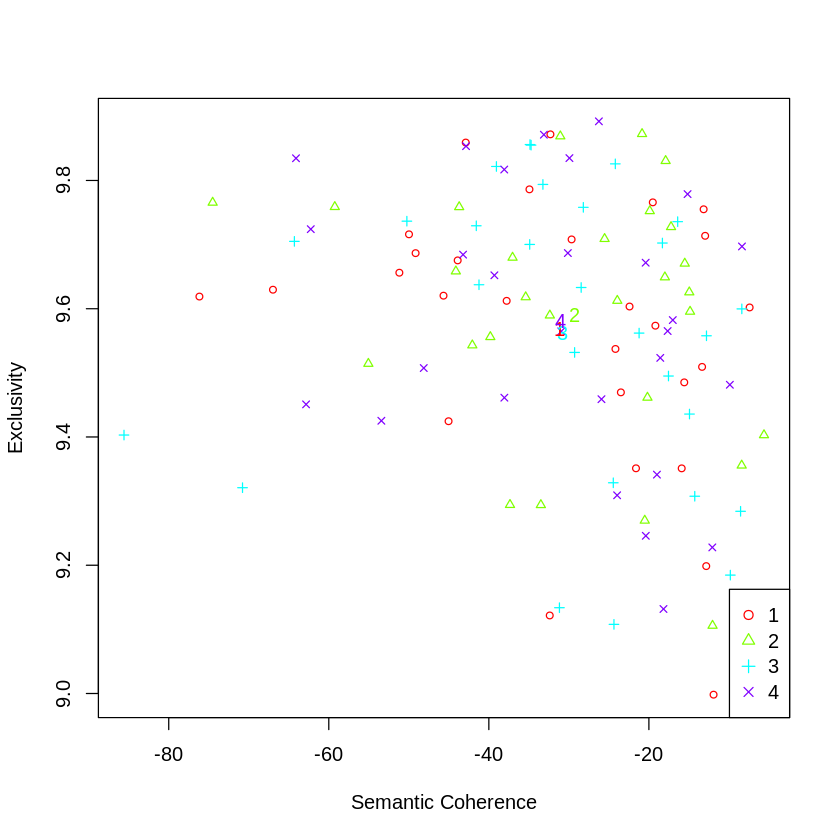

In [17]:
#plot semantic coherence vs exclusivity of the individual topics and average of each model 
plotModels(charterSelect, pch=c(1,2,3,4,5), legend.position="bottomright")

In [18]:
#save the best model to text_analysis/topic_modeling 
model <- charterSelect$runout[[2]]
#save(model, file='/home/jovyan/work/text_analysis/topic_modeling/charterSelectBestModel.RData')

In [19]:
#Shows the top 50 words for each topic according to Highest, FREX, Lift, and Score measures with Frex =.7
labelTopics(model, n=50, frexweight = .7)

Topic 1 Top Words:
 	 Highest Prob: student, cours, school, high, colleg, credit, requir, onlin, class, program, educ, inform, graduat, complet, career, test, learn, english, enrol, year, grade, offer, applic, work, take, help, studi, need, plan, parent, attend, univers, state, resourc, option, must, meet, schedul, person, provid, admiss, scienc, transcript, contact, opportun, includ, avail, semest, advanc, elect 
 	 FREX: cours, credit, transcript, semest, test, onlin, algebra, elect, requir, colleg, gilbert, english, creek, graduat, complet, technic, offer, exam, sat, advanc, queen, take, homeschool, placement, tradit, class, counselor, virtual, biolog, option, session, guidanc, advisor, career, accredit, independ, catalog, earn, riversid, high, coursework, vendor, dual, student, studi, admiss, geometri, choic, transfer, per 
 	 Lift: edgenu, gilbert, concurr, plato, riversid, fastweb, cours, pre-calculus, glendal, ncaa, cosmetolog, laurel, weld, placer, psat, transcript, automot, qu

### Or... Skip and Load Saved Model

In [20]:
load('/home/jovyan/work/swarm/output/charterSelectModel2.RData')

## Estimate Topic Relationships with Race & Class

### Pairwise Comparisons by Race

In [21]:
#Use the best model to estimate the significance between each topic and the white_students and hispanic_students covariates
white_hispanic <- estimateEffect(~ white_students + hispanic_students, model, meta = meta, uncertainty = "Global")
summary(white_hispanic)


Call:
estimateEffect(formula = ~white_students + hispanic_students, 
    stmobj = model, metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.018437   0.002970   6.208 5.79e-10 ***
white_students    0.050331   0.004861  10.355  < 2e-16 ***
hispanic_students 0.018952   0.005070   3.738 0.000188 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.043768   0.002861  15.300  < 2e-16 ***
white_students    -0.021968   0.004290  -5.121 3.15e-07 ***
hispanic_students -0.002093   0.004763  -0.439     0.66    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.036277   0.002994  12.115   <2e-16 ***
white_students    -0.006763   0.004344  -1.557    0.120    
h

In [41]:
#plot('white_hispanic', 'white_students')

In [23]:
#Estimate the significance between each topic and the white_students and black_students covariates
white_black <- estimateEffect(~ white_students + black_students, model, meta = meta, uncertainty = "Global")
summary(white_black)




Call:
estimateEffect(formula = ~white_students + black_students, stmobj = model, 
    metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.036195   0.003185  11.364  < 2e-16 ***
white_students  0.029772   0.005539   5.375    8e-08 ***
black_students -0.018860   0.004887  -3.859 0.000115 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.040881   0.002645  15.457  < 2e-16 ***
white_students -0.019106   0.004378  -4.365  1.3e-05 ***
black_students  0.005286   0.004395   1.203    0.229    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0306241  0.0028996  10.561   <2e-16 ***
white_students 0.0001086  0.0047994   0.023    0.982    
black_students 0.0071264  0.00502

In [24]:
#Estimate the significance between each topic and the hispanic_students and black_students covariates
black_hispanic <- estimateEffect(~ black_students + hispanic_students, model, meta = meta, uncertainty = "Global")
summary(black_hispanic)



Call:
estimateEffect(formula = ~black_students + hispanic_students, 
    stmobj = model, metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.059868   0.002446  24.474  < 2e-16 ***
black_students    -0.043565   0.004278 -10.184  < 2e-16 ***
hispanic_students -0.023077   0.004515  -5.111 3.33e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.024079   0.002117  11.375  < 2e-16 ***
black_students    0.021859   0.004009   5.453 5.20e-08 ***
hispanic_students 0.018316   0.004120   4.445 8.98e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.0301658  0.0024450  12.338   <2e-16 ***
black_students    0.0073245  0.0045501   1.610    0.108    
h

In [25]:
#Estimate the significance between each topic and the white_district and hispanic_district covariates
white_hispanic_district <- estimateEffect(~ white_district + hispanic_district, model, meta = meta, uncertainty = "Global")
summary(white_hispanic_district)


Call:
estimateEffect(formula = ~white_district + hispanic_district, 
    stmobj = model, metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.874e-03  4.905e-03   0.790    0.430    
white_district     5.754e-04  6.884e-05   8.358   <2e-16 ***
hispanic_district -1.830e-01  3.000e-01  -0.610    0.542    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.827e-02  4.578e-03  10.546  < 2e-16 ***
white_district    -1.922e-04  6.443e-05  -2.983  0.00287 ** 
hispanic_district -1.137e-02  2.764e-01  -0.041  0.96719    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.0416783  0.0044177   9.434   <2e-16 ***
white_district    -0.0001400  0.0000615  -2.277

In [26]:
#Estimate the significance between each topic and the white_district and black_district covariates
white_black_district <- estimateEffect(~ white_district + black_district, model, meta = meta, uncertainty = "Global")
summary(white_black_district)


Call:
estimateEffect(formula = ~white_district + black_district, stmobj = model, 
    metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     0.0270080  0.0094290   2.864  0.00420 **
white_district  0.0003084  0.0001148   2.687  0.00723 **
black_district -0.0003436  0.0001199  -2.865  0.00419 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.767e-02  8.082e-03   5.899  3.9e-09 ***
white_district -1.856e-04  9.703e-05  -1.913   0.0559 .  
black_district  9.465e-06  1.027e-04   0.092   0.9266    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0150372  0.0083871   1.793 0.073049 .  
white_district 0.0001513  0.0001012   1.495 0.135005    
black_district 0.0004090  0.0

In [27]:
#Estimate the significance between each topic and the black_district and hispanic_district covariates
black_hispanic_district <- estimateEffect(~ black_district + hispanic_district, model, meta = meta, uncertainty = "Global")
summary(black_hispanic_district)


Call:
estimateEffect(formula = ~black_district + hispanic_district, 
    stmobj = model, metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.0532310  0.0019004  28.010   <2e-16 ***
black_district    -0.0006229  0.0000674  -9.242   <2e-16 ***
hispanic_district -0.3429780  0.2927513  -1.172    0.241    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.249e-02  1.744e-03  18.626  < 2e-16 ***
black_district    1.700e-04  6.533e-05   2.602  0.00929 ** 
hispanic_district 1.625e-02  2.509e-01   0.065  0.94836    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.791e-02  1.749e-03  15.956  < 2e-16 ***
black_district     2.600e-04  6.876e-05   3.782 0.0

### One-at-a-time Comparisons by Race (with controls)

#### School level

In [28]:
#Use the best model to estimate the significance between each topic and the white_students covariate
white_effect <- estimateEffect(~ white_students, model, meta = meta, uncertainty = "Global")
summary(white_effect)


Call:
estimateEffect(formula = ~white_students, stmobj = model, metadata = meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.027652   0.001946  14.209   <2e-16 ***
white_students 0.040726   0.004150   9.814   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.043183   0.001772  24.372  < 2e-16 ***
white_students -0.021975   0.003597  -6.109 1.08e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.033246   0.001822   18.25   <2e-16 ***
white_students -0.002937   0.003917   -0.75    0.453    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0

In [29]:
#Estimate the significance between each topic and the black_students covariate
black_effect <- estimateEffect(~ black_students, model, meta = meta, uncertainty = "Global")
summary(black_effect)



Call:
estimateEffect(formula = ~black_students, stmobj = model, metadata = meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.050737   0.001775  28.581   <2e-16 ***
black_students -0.034742   0.004113  -8.447   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.031514   0.001607  19.609  < 2e-16 ***
black_students 0.014839   0.004141   3.584 0.000342 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.030378   0.001544  19.671   <2e-16 ***
black_students 0.007280   0.004123   1.766   0.0775 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.04

In [30]:
#Estimate the significance between each topic and the hispanic_students covariate
hispanic_effect <- estimateEffect(~ hispanic_students, model, meta = meta, uncertainty = "Global")
summary(hispanic_effect)


Call:
estimateEffect(formula = ~hispanic_students, stmobj = model, 
    metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.044332   0.002148  20.639   <2e-16 ***
hispanic_students -0.006974   0.004625  -1.508    0.132    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.032385   0.001749  18.517   <2e-16 ***
hispanic_students 0.009368   0.003816   2.455   0.0141 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.033003   0.001704  19.362   <2e-16 ***
hispanic_students -0.002739   0.003870  -0.708    0.479    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                   Estimate Std. Error t val

In [31]:
#Estimate the significance between each topic and the asian_students covariate
asian_effect <- estimateEffect(~ asian_students, model, meta = meta, uncertainty = "Global")
summary(asian_effect)


Call:
estimateEffect(formula = ~asian_students, stmobj = model, metadata = meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.04317    0.00143  30.192   <2e-16 ***
asian_students -0.01932    0.01471  -1.313    0.189    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0351512  0.0012567  27.970   <2e-16 ***
asian_students 0.0007365  0.0140725   0.052    0.958    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.032432   0.001323  24.518   <2e-16 ***
asian_students -0.007773   0.013124  -0.592    0.554    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.

In [38]:
#Estimate the significance between each topic and white_students + asian_students
meta$whasian_students = meta$white_students + meta$asian_students
whasian_effect <- estimateEffect(~ whasian_students, model, meta = meta, uncertainty = "Global")
summary(whasian_effect)


Call:
estimateEffect(formula = ~whasian_students, stmobj = model, metadata = meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.027958   0.002000  13.978   <2e-16 ***
whasian_students 0.036173   0.003899   9.277   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.043548   0.002028  21.472  < 2e-16 ***
whasian_students -0.020526   0.003606  -5.693 1.32e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.033719   0.001947  17.318   <2e-16 ***
whasian_students -0.003765   0.003861  -0.975     0.33    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|) 

In [39]:
#Estimate the significance between each topic and black_students + hispanic_students

meta$hispblack_students = meta$hispanic_students + meta$black_students
hispblack_effect <- estimateEffect(~ hispblack_students, model, meta = meta, uncertainty = "Global")
summary(hispblack_effect)


Call:
estimateEffect(formula = ~hispblack_students, stmobj = model, 
    metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.060796   0.002474  24.570   <2e-16 ***
hispblack_students -0.033920   0.003625  -9.357   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.024405   0.002106  11.590  < 2e-16 ***
hispblack_students 0.019662   0.003335   5.895 3.99e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.030025   0.002196  13.675   <2e-16 ***
hispblack_students 0.004045   0.003337   1.212    0.225    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                    Estimate Std. Err

In [ ]:
#Estimate the significance between each topic and black_students + hispanic_students

#### School district level

In [30]:
#Estimate the significance between each topic and the white_district covariate
white_district <- estimateEffect(~ white_district, model, meta = meta, uncertainty = "Global")
summary(white_district)


Call:
estimateEffect(formula = ~white_district, stmobj = model, metadata = meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.464e-03  4.436e-03   0.781    0.435    
white_district 5.740e-04  6.435e-05   8.919   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.795e-02  4.198e-03  11.422  < 2e-16 ***
white_district -1.895e-04  5.946e-05  -3.186  0.00145 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0427073  0.0045589   9.368   <2e-16 ***
white_district -0.0001552  0.0000645  -2.407   0.0161 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Interce

In [32]:
#Estimate the significance between each topic and the black_district covariate
black_district <- estimateEffect(~ black_district, model, meta = meta, uncertainty = "Global")
summary(black_district)


Call:
estimateEffect(formula = ~black_district, stmobj = model, metadata = meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.254e-02  1.909e-03  27.516   <2e-16 ***
black_district -6.176e-04  7.211e-05  -8.564   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.246e-02  1.574e-03  20.628   <2e-16 ***
black_district 1.604e-04  6.477e-05   2.476   0.0133 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.779e-02  1.671e-03  16.629  < 2e-16 ***
black_district 2.638e-04  6.827e-05   3.864 0.000113 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept

In [39]:
#Estimate the significance between each topic and the hispanic_district covariate
hispanic_district <- estimateEffect(~ hispanic_district, model, meta = meta, uncertainty = "Global")
summary(hispanic_district)


Call:
estimateEffect(formula = ~hispanic_district, stmobj = model, 
    metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.04279    0.00145  29.510   <2e-16 ***
hispanic_district -0.28786    0.30134  -0.955    0.339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.035390   0.001351  26.198   <2e-16 ***
hispanic_district -0.062005   0.272474  -0.228     0.82    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.032319   0.001451  22.272   <2e-16 ***
hispanic_district -0.047474   0.268988  -0.176     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                  Estimate Std. Error t valu

In [40]:
#Estimate the significance between each topic and the asian_district covariate
asian_district <- estimateEffect(~ asian_district, model, meta = meta, uncertainty = "Global")
summary(asian_district)


Call:
estimateEffect(formula = ~asian_district, stmobj = model, metadata = meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0427200  0.0018077   23.63   <2e-16 ***
asian_district -0.0001151  0.0002093   -0.55    0.582    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0336940  0.0014952  22.535   <2e-16 ***
asian_district 0.0002899  0.0001796   1.614    0.106    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0337570  0.0015219  22.180   <2e-16 ***
asian_district -0.0002673  0.0001808  -1.478    0.139    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Interce

In [42]:
#Estimate the significance between each topic and white_district + asian_district

meta$whasian_district = meta$white_district + meta$asian_district
whasian_district <- estimateEffect(~ whasian_district, model, meta = meta, uncertainty = "Global")
summary(whasian_district)


Call:
estimateEffect(formula = ~whasian_district, stmobj = model, metadata = meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.609e-03  5.141e-03  -0.702    0.483    
whasian_district  6.334e-04  6.824e-05   9.282   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.871e-02  5.001e-03   9.741  < 2e-16 ***
whasian_district -1.858e-04  6.535e-05  -2.843  0.00448 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.658e-02  5.172e-03   9.007   <2e-16 ***
whasian_district -1.962e-04  6.987e-05  -2.808    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                  Estimate Std. Error t va

In [44]:
#Estimate the significance between each topic and black_district + hispanic_district

meta$hispblack_district = meta$hispanic_district + meta$black_district
hispblack_district <- estimateEffect(~ hispblack_district, model, meta = meta, uncertainty = "Global")
summary(hispblack_district)


Call:
estimateEffect(formula = ~hispblack_district, stmobj = model, 
    metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.234e-02  1.892e-03  27.670   <2e-16 ***
hispblack_district -6.150e-04  7.245e-05  -8.489   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.244e-02  1.599e-03  20.290   <2e-16 ***
hispblack_district 1.669e-04  6.599e-05   2.529   0.0115 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.770e-02  1.631e-03  16.985  < 2e-16 ***
hispblack_district 2.746e-04  7.118e-05   3.858 0.000116 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                     Estimat

### Poverty

In [19]:
#Estimate the significance between each topic and poor_students covariate
poverty <- estimateEffect(~ poor_students, model, meta = meta, uncertainty = "Global")
summary(poverty)


Call:
estimateEffect(formula = ~poor_students, stmobj = model, metadata = meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.102e-02  2.737e-03   22.29  < 2e-16 ***
poor_students -3.320e-04  4.182e-05   -7.94 2.49e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.885e-02  2.444e-03  11.806  < 2e-16 ***
poor_students 1.133e-04  3.786e-05   2.993  0.00277 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.825e-02  2.531e-03  11.161   <2e-16 ***
poor_students 6.656e-05  3.801e-05   1.751     0.08 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.554e

In [20]:
#Estimate the significance between each topic and poverty_district covariate
poverty_district <- estimateEffect(~ poverty_district, model, meta = meta, uncertainty = "Global")
summary(poverty_district)


Call:
estimateEffect(formula = ~poverty_district, stmobj = model, metadata = meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.058154   0.002957  19.669  < 2e-16 ***
poverty_district -0.001078   0.000173  -6.231 5.02e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.440e-02  2.445e-03  14.070   <2e-16 ***
poverty_district 5.195e-05  1.514e-04   0.343    0.731    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.0290627  0.0026513   10.96   <2e-16 ***
poverty_district 0.0002210  0.0001613    1.37    0.171    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
                   Estimate Std. Error t value Pr(>

## Save Image

In [46]:
save.image(file='/home/jovyan/work/text_analysis/topic_modeling/estimateEffectData.RData')